# Binary Logistic Regression

BinaryLogistic Regression is a classification model.It requries dependent variable to be binary(two possible values), such as exam(pass/fail), sex (male/female), response(yes/no),score(high/low), etc….
 which is represented by an indicator variable, where the two values are labeled "0" and "1".



In this project,I build a classifier to classify whether a diabetic or not by training a binary classification model using 
Logistic Regression. I have used the pima dataset downloaded from the uci machine learning repository website for this project.


In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing the pima dataset
data= pd.read_csv('D:\\ML_Datasets\\diabetics\\india_pima_diabetics.csv')

In [3]:
#view dimensons(no of rows and columns) of the dataset
data.shape

(768, 9)

The dataset contains 768 rows and 9 columns

In [4]:
# preview the dataset
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Description of the data
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#view summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# check missing values in the dataset 
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

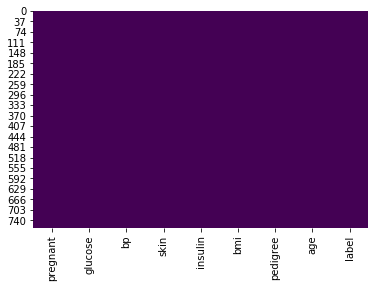

In [9]:
#Checking the missing values in the data
sns.heatmap(data.isnull(),cbar=False,cmap="viridis")
plt.show()

there is no missing values in the dataset

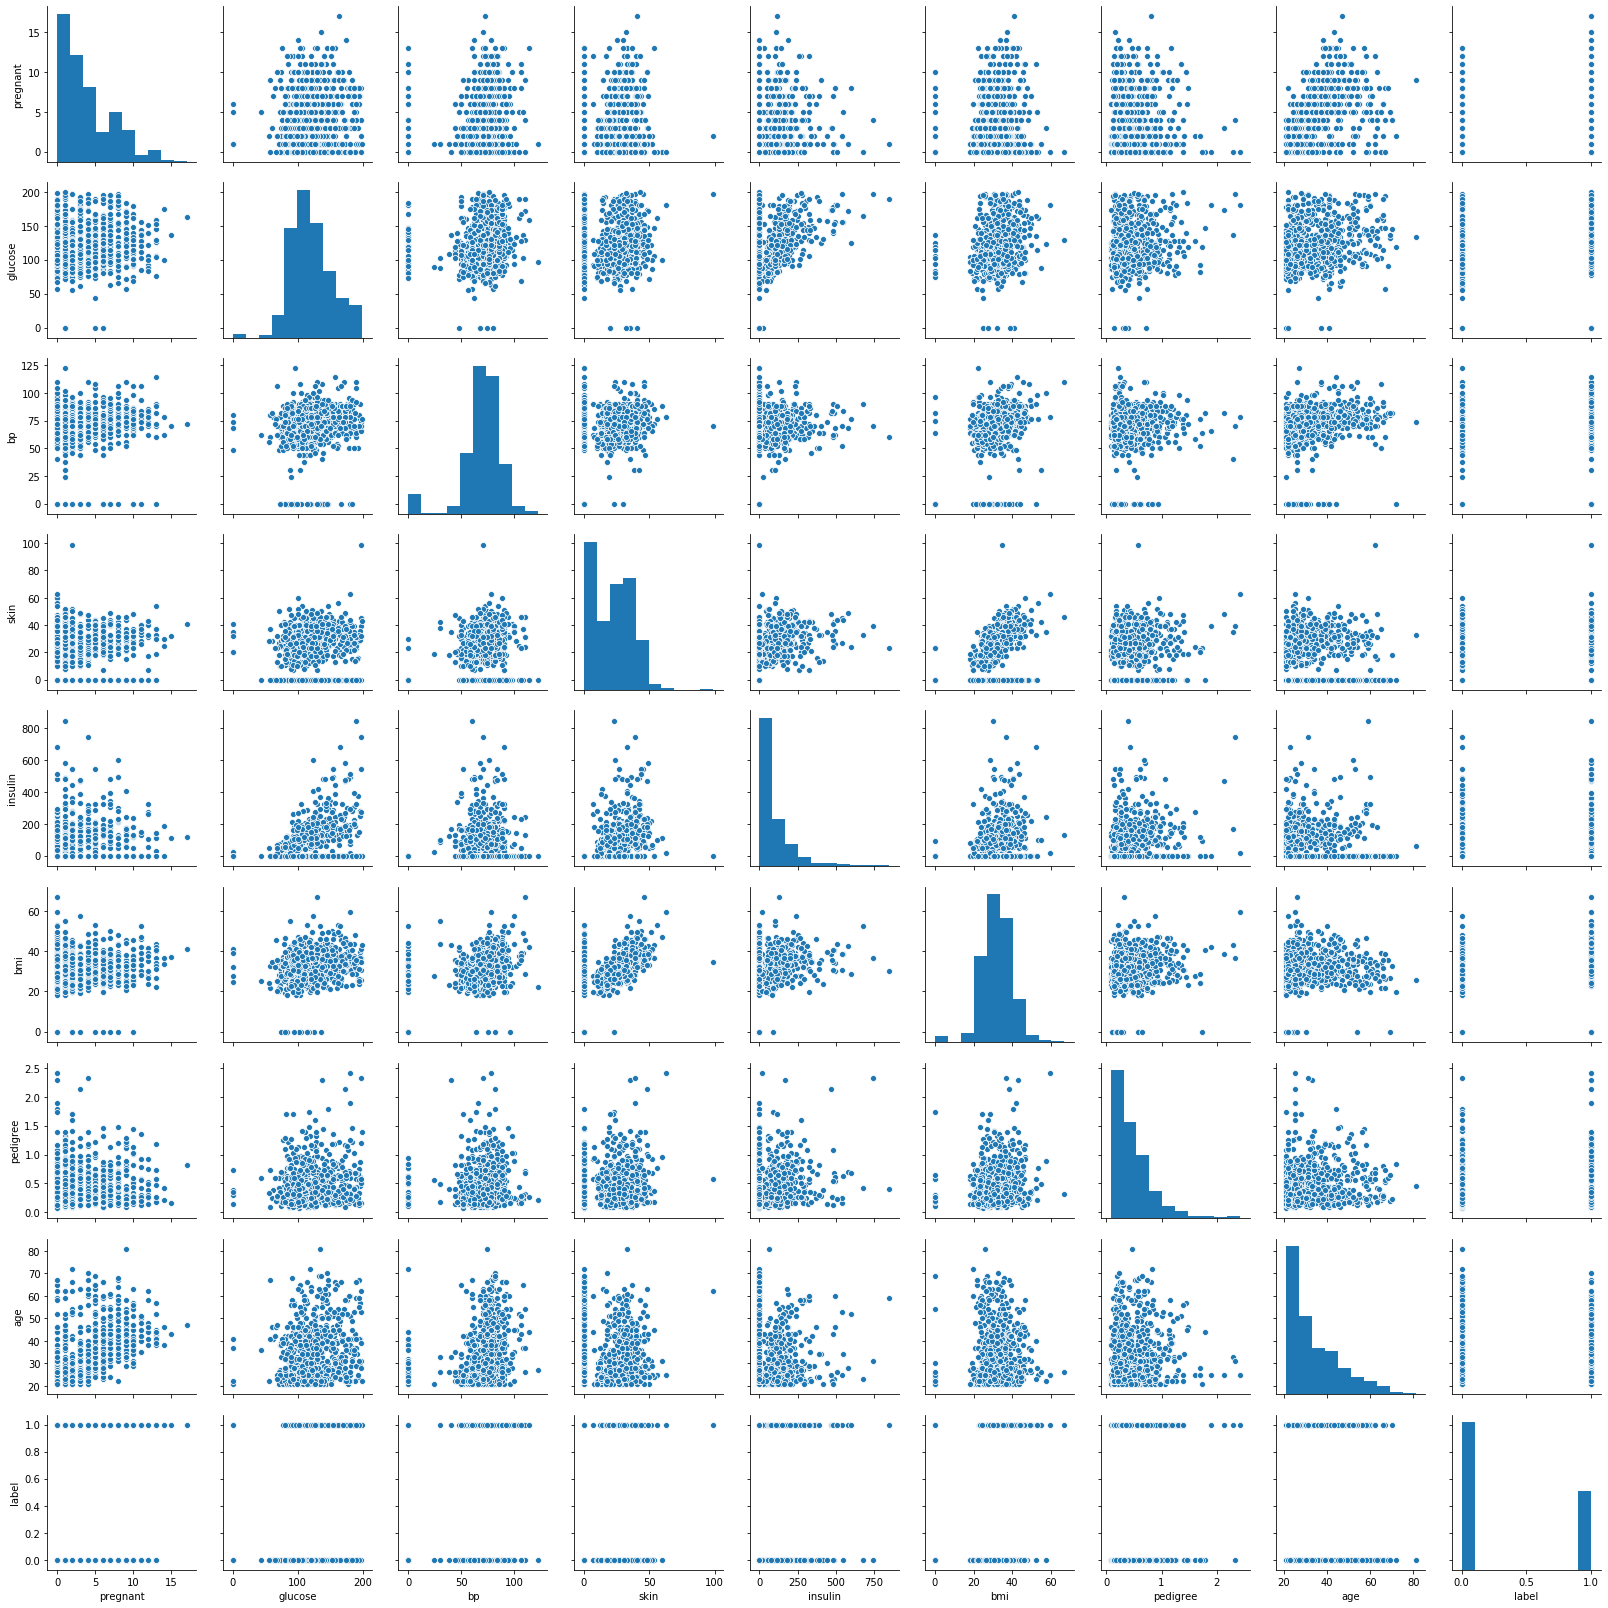

In [10]:
sns.pairplot(data)

Text(0.5, 1, 'Heatmap')

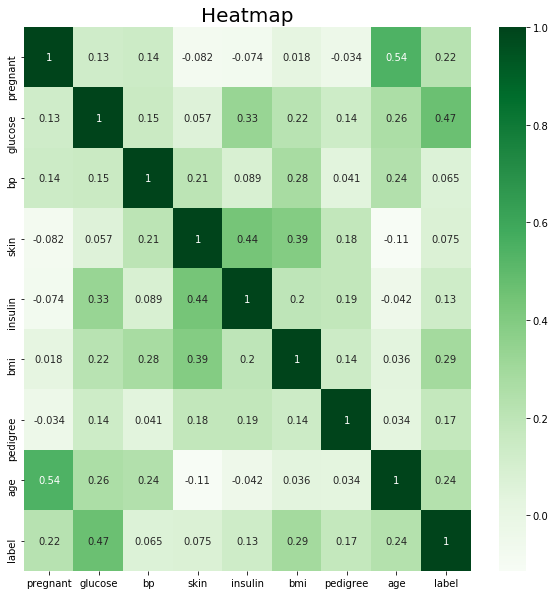

In [11]:
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Greens")
plt.title('Heatmap', fontsize=20)

In [16]:
# checking the columns of the data
data.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [13]:
#split the dataset in features and target variable
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(X.head(2))
print(y.head(2))


   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
0         6      148  72    35        0  33.6     0.627   50
1         1       85  66    29        0  26.6     0.351   31
0    1
1    0
Name: label, dtype: int64


Spliting the dataset into training and testing for training 80 percent testing 20 percent

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [15]:
# import the class 
from sklearn.linear_model import LogisticRegression
#instantiate the model(using default parameters)
logreg=LogisticRegression()

In [17]:
#fit the model with data
logreg.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#Predicting the results
y_pred=logreg.predict(X_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of no rain and 1 is for probability of rain.



In [19]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0].sum()


98.83814383944141

In [20]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1].sum()

55.161856160558585

In [21]:
#Check accuracy score
from sklearn import metrics
print("Accuracy_score:",metrics.accuracy_score(y_test,y_pred))

Accuracy_score: 0.8181818181818182


In [22]:
#import the metrics class
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
print(cnf_matrix) #26 and 11 are incorrect predictions

[[98  9]
 [19 28]]


Confusion matrix

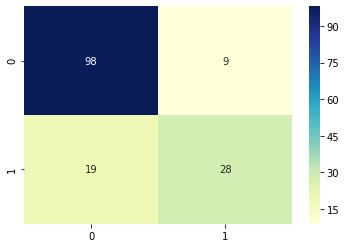

In [23]:
#create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')

In [24]:
#Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.8181818181818182
Precision: 0.7567567567567568
Recall: 0.5957446808510638


Roc Curve

<function matplotlib.pyplot.show(*args, **kw)>

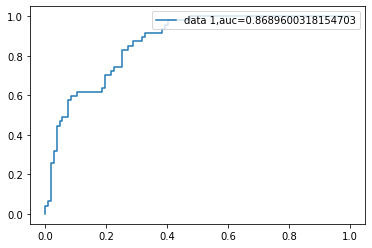

In [25]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.legend(loc=1)
plt.show

the auc(area under curve value is 0.87)